1) 그래디언트 부스팅 이해하기

2) 그래디언트 부스팅 실습하기

(1) 데이터 준비하기

In [4]:
#tensorflow에서 데이터 불러오기
from tensorflow.keras.datasets.mnist import load_data

In [5]:
#그래프 라이브러리 불러오기
import matplotlib.pyplot as plt

In [6]:
#데이터 불러오기
(x_train, y_train), (x_test, y_test) = load_data()

In [7]:
#학습시간 고려해서 2,000건 데이터만 사용하기
x_train = x_train[:2000]
y_train = y_train[:2000]
x_test = x_test[:2000]
y_test = y_test[:2000]

In [10]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

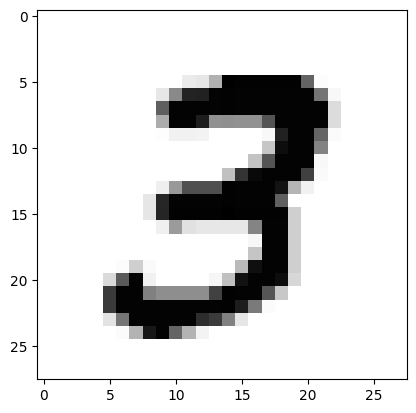

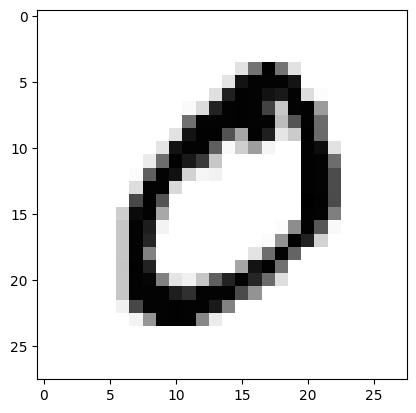

In [11]:
#샘플 데이터 확인하기
plt.imshow(x_train[7], cmap="Greys")
plt.show()

#샘플 데이터 확인하기
plt.imshow(x_train[1], cmap="Greys")
plt.show()

In [12]:
#학습을 위한 2차원 행렬로 변경하기
X_train = x_train.reshape(-1, 784)
X_test = x_test.reshape(-1, 784)

(2) 알고리즘별 학습 및 결과 비교하기

In [14]:
#의사결정나무, 랜덤포레스트, 그래디언트 부스팅 라이브러리 불러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [15]:
#의사결정나무 불러오기 및 학습하기
dct = DecisionTreeClassifier(random_state=0)
dct.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [16]:
#의사결정나무 학습 결과 저장하기
acc_train_dct = dct.score(X_train, y_train)
acc_test_dct = dct.score(X_test, y_test)

In [17]:
#랜덤 포레스트 불러오기 및 학습하기
rfc= RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [18]:
#랜덤포레스트 학습 결과 저장하기
acc_train_rfc = rfc.score(X_train, y_train)
acc_test_rfc = rfc.score(X_test, y_test)

In [19]:
#그래디언트 부스팅 불러오기 및 학습하기
gbc= GradientBoostingClassifier(random_state=0, verbose=1)
gbc.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.8398            2.03m
         2           1.5879            1.81m
         3           1.4024            1.70m
         4           1.2584            1.63m
         5           1.1338            1.58m
         6           1.0258            1.54m
         7           0.9359            1.51m
         8           0.8556            1.53m
         9           0.7863            1.54m
        10           0.7247            1.54m
        20           0.3653            1.34m
        30           0.2167            1.14m
        40           0.1423           58.72s
        50           0.0982           48.97s
        60           0.0720           39.10s
        70           0.0540           29.31s
        80           0.0410           19.53s
        90           0.0321            9.76s
       100           0.0252            0.00s


GradientBoostingClassifier(random_state=0, verbose=1)

In [20]:
#그래디언트 부스팅 학습 결과 저장하기
acc_train_gbc = gbc.score(X_train, y_train)
acc_test_gbc = gbc.score(X_test, y_test)

In [22]:
#각 알고리즘별 성능 비교하기
print(f"""의사결정나무 train_acc = {round(acc_train_dct, 3)}, test_acc = {round(acc_test_dct, 3)} """)

print(f"""랜덤 포레스트 train_acc = {round(acc_train_rfc, 3)}, test_acc = {round(acc_test_rfc, 3)} """)

print(f"""그래디언트 부스팅 train_acc = {round(acc_train_gbc, 3)}, test_acc = {round(acc_test_gbc, 3)} """)

의사결정나무 train_acc = 1.0, test_acc = 0.652 
랜덤 포레스트 train_acc = 1.0, test_acc = 0.875 
그래디언트 부스팅 train_acc = 1.0, test_acc = 0.828 


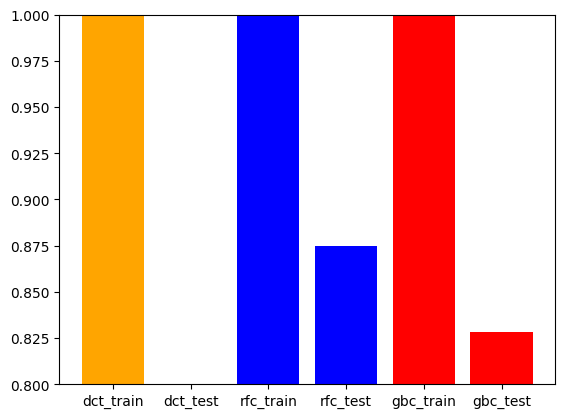

In [23]:
#비교 그래프 그리기
import matplotlib.pyplot as plt
acc_list_x = ['dct_train', 'dct_test', 'rfc_train', 'rfc_test', 'gbc_train', 'gbc_test']
acc_list_y = [acc_train_dct, acc_test_dct, acc_train_rfc, acc_test_rfc, acc_train_gbc, acc_test_gbc]

colors = ['orange', 'orange', 'blue', 'blue', 'red', 'red']
plt.bar(acc_list_x, acc_list_y, color=colors)
plt.ylim([0.8, 1.0])
plt.show()

In [ ]:
그래디언트 부스팅의 시험 데이터세트에 대한 성능이 의사결정나무보다 더 좋지만, 랜덤포레스트보다 떨어진다.